In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import bokeh
from bokeh.plotting import figure, output_file, show, ColumnDataSource
# import bokeh.charts.utils
import bokeh.io
import bokeh.models
from bokeh.models import HoverTool
import bokeh.palettes
import bokeh.plotting
import random
from random import sample
from sklearn import svm, neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model


from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


import multiprocessing as mp


In [2]:
# Preprocessing, normalization done in excel (Xnew = (X-mean)/std))
# If we want to normalize in Python we can use preprocessing.scale()
Data = pd.read_csv('songs4.csv')
Data = Data.iloc[:, 0:18]
#Data = Data.drop(Data[(Data.time_signature > 5)].index)
Data.head()

,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts
0,5CQ30WqJwcep0pYcV4AMNc,-1.268543,-0.885605,1.050276,-0.280775,-1.258128,-0.630077,0.678645,-0.649848,-0.480625,-1.032112,-1.205528,1.347462,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
1,0yE62JSC9J9C4Q4OBMwBgA,-0.385007,-0.303138,1.050276,0.009403,0.794818,2.212337,-0.630163,-0.658555,-0.504163,-0.175880,-0.772431,-0.113739,-0.040332,-0.105962,3.181954,-2.641279,-0.152588
2,66v8ihTuXUDKqienUaFzIe,-1.191040,-0.723399,-0.901086,-0.765659,0.794818,0.067502,-0.499560,-0.658546,-0.357049,-0.255795,1.629569,-0.519527,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
3,6l4HJkk0CwELcf1CgrbAth,1.511236,0.098691,-1.179852,0.430741,0.794818,-0.338460,-0.052175,-0.658555,0.113717,-0.000828,0.370186,-0.701656,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
4,68rPZWbtaNGUh15AVTSlNn,-0.152498,0.330941,-1.179852,0.428633,0.794818,0.561423,-0.893036,-0.658555,-0.527702,-0.274822,0.025924,0.156217,-0.040332,-0.105962,-0.314267,0.378598,-0.152588


In [3]:
# check number of rows
Data.count()

ID                  60342
danceability        60342
energy              60342
key                 60342
loudness            60342
mode                60342
speechiness         60342
acousticness        60342
instrumentalness    60342
liveness            60342
valence             60342
tempo               60342
duration_ms         60342
zero_ts             60342
one_ts              60342
three_ts            60342
four_ts             60342
five_ts             60342
dtype: int64

In [4]:
# Divide into testing and training
x = Data.drop('valence', 1)
y = Data.valence
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
train = xtrain.assign(valence=ytrain)
train = train [0: 20000]
train.head()

,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts,valence
20014,3poqFvDk6uAZYn9pEJO0Iy,1.051384,0.928155,-0.343554,0.589909,-1.258128,-0.294481,-0.029945,-0.658555,-0.539471,0.440975,-0.051172,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,1.346311
31687,6HyTQDeezhfbGSBBElVvsM,-0.348839,-0.763951,-1.458618,0.021751,0.794818,-0.536705,1.270526,1.632470,-0.404126,0.024399,-0.412193,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,1.669777
30894,6yhDPsUs2j1zPYZ3qp0gZR,1.134054,0.124497,0.492744,0.420049,-1.258128,-0.496109,-0.930774,-0.656843,-0.831934,0.305467,0.290265,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,1.182676
42749,4OXW39n1cE8muYSgnrUgnx,1.376897,-0.384241,0.213978,0.735827,0.794818,-0.506258,-0.747149,-0.658555,-0.304088,-0.457859,-0.369681,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-0.099770
27923,3Hbd6gPZ0QErPWXVkC6GRt,-0.002659,0.810187,1.607808,0.252900,-1.258128,-0.623310,0.300730,1.635191,0.019563,0.837582,-0.566260,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-0.819006


In [5]:
# Create correlation matrix
M = train.corr()

In [6]:
M

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts,valence
danceability,1.000000,0.385328,0.054389,0.462818,-0.069374,0.231819,-0.445136,-0.305013,-0.045287,0.060501,-0.109073,-0.120247,-0.068778,-0.249857,0.288339,-0.079395,0.484887
energy,0.385328,1.000000,0.077801,0.828086,-0.065558,0.130206,-0.750342,-0.338552,0.214431,0.265253,-0.087160,-0.071302,-0.072587,-0.255763,0.281484,-0.063703,0.382529
key,0.054389,0.077801,1.000000,0.064689,-0.189446,0.035344,-0.055211,-0.039089,0.008947,0.013944,-0.007606,-0.028462,-0.001738,-0.025869,0.028342,-0.003980,0.057984
loudness,0.462818,0.828086,0.064689,1.000000,-0.045270,0.117576,-0.672591,-0.492323,0.155186,0.241571,-0.120475,-0.132338,-0.081959,-0.240540,0.280143,-0.066781,0.373109
mode,-0.069374,-0.065558,-0.189446,-0.045270,1.000000,-0.034166,0.072659,-0.005368,0.006327,0.012730,-0.001115,-0.019499,0.014947,0.034742,-0.037362,0.011454,-0.010980
speechiness,0.231819,0.130206,0.035344,0.117576,-0.034166,1.000000,-0.077907,-0.276981,0.182393,0.007989,-0.020457,-0.034931,0.028106,-0.005282,-0.044896,0.101747,0.124074
acousticness,-0.445136,-0.750342,-0.055211,-0.672591,0.072659,-0.077907,1.000000,0.314423,-0.088886,-0.229741,0.059667,-0.004668,0.074156,0.278564,-0.289274,0.057090,-0.234931
instrumentalness,-0.305013,-0.338552,-0.039089,-0.492323,-0.005368,-0.276981,0.314423,1.000000,-0.136794,-0.068060,0.169129,0.017770,0.027632,0.116353,-0.114882,0.007225,-0.312069
liveness,-0.045287,0.214431,0.008947,0.155186,0.006327,0.182393,-0.088886,-0.136794,1.000000,0.028363,-0.012501,0.001750,-0.007954,-0.018468,0.015417,0.006316,0.046576
tempo,0.060501,0.265253,0.013944,0.241571,0.012730,0.007989,-0.229741,-0.068060,0.028363,1.000000,-0.045005,-0.152093,-0.019171,-0.024205,0.060055,-0.031678,0.120755


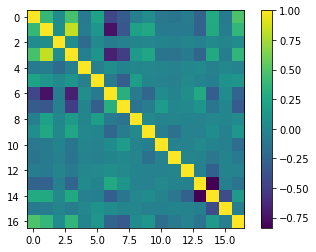

In [7]:
# correlation matrix
plt.imshow(M)
plt.colorbar()
plt.show()

In [8]:
# SVD using numpy function
U, E, VT = np.linalg.svd(M)

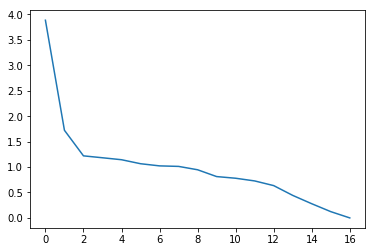

In [9]:
plt.plot(E)
plt.show()

In [10]:
P = np.dot(U[:,:2],np.diag(E[:2]))

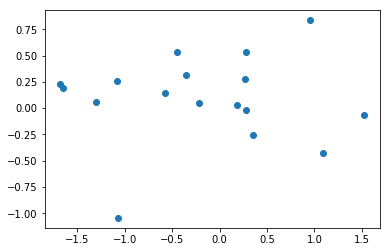

In [11]:
plt.plot(P[:,0], P[:,1],'o')
plt.show()

In [12]:
N = train.T
N.columns = N.iloc[0]
N = N.drop('ID')
N = N.astype(float)

In [13]:
# Takes 10-15 minutes with all of the data
N = N.corr()
N.head()

ID,3poqFvDk6uAZYn9pEJO0Iy,6HyTQDeezhfbGSBBElVvsM,6yhDPsUs2j1zPYZ3qp0gZR,4OXW39n1cE8muYSgnrUgnx,3Hbd6gPZ0QErPWXVkC6GRt,0DBVLbvWooRJCrwF5SqtgY,3gyuSW7lgLerN8ji2hCixv,4I1Vup3GUNXlBOVlFlqtCv,2PUEqezcStbwVTOqosTKjW,0DZbJqCHMdqmqhVOFhqfmT,...,4kZvohccEm98bY1LU6yXKD,050tPbqMVtcXWgFEVC5azb,0Bq7bUdwCicjNautd0mIa7,2b3WYYQOnfT0DByZvSfh1M,2KCYLOGGq3h4SdDQGIbVk0,0oeN2KUBMnsuwAc8SGfTfy,67YpTbF3dSYBKx7MZFCDto,51amkhjWDeXpdj79FEPoyB,4jeWJxhEVJU8v5PwPeTs7B,4vyDs6A76Dvd0DWNdY554i
ID,,,,,,,,,,,,,,,,,,,,,
3poqFvDk6uAZYn9pEJO0Iy,1.000000,0.021154,0.836539,0.200616,0.057826,-0.005841,0.501223,0.657589,0.315953,-0.619117,...,0.081910,-0.055291,-0.446559,-0.159506,0.470474,-0.526517,0.857599,-0.205203,0.049878,0.543779
6HyTQDeezhfbGSBBElVvsM,0.021154,1.000000,-0.183398,-0.153564,-0.148054,0.261029,0.433872,-0.558870,0.084961,0.438284,...,-0.237284,0.444192,0.130826,-0.258813,-0.121423,0.364348,-0.043192,-0.265661,-0.292783,0.500133
6yhDPsUs2j1zPYZ3qp0gZR,0.836539,-0.183398,1.000000,0.395912,0.114377,-0.121201,0.359228,0.689960,0.308998,-0.676640,...,0.396787,-0.181758,-0.305796,-0.082654,0.713933,-0.552714,0.751538,-0.213445,0.145204,0.366381
4OXW39n1cE8muYSgnrUgnx,0.200616,-0.153564,0.395912,1.000000,-0.212391,0.509061,0.481725,0.115423,0.588356,-0.429337,...,0.037293,-0.058910,-0.386516,-0.205656,0.677694,-0.427300,0.145098,-0.195718,0.061119,0.267690
3Hbd6gPZ0QErPWXVkC6GRt,0.057826,-0.148054,0.114377,-0.212391,1.000000,-0.532470,-0.301787,0.301020,-0.402561,-0.110585,...,0.505852,-0.001076,0.342148,-0.076542,-0.102167,-0.044545,0.136823,0.054585,-0.280089,-0.264282


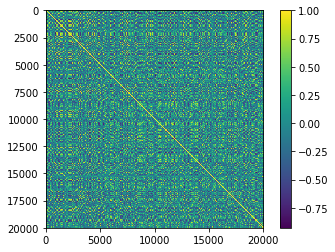

In [14]:
# Identifies how different songs correlate to each other, there is a fair amount of uniqueness among songs
plt.imshow(N)
plt.colorbar()
plt.show()

In [29]:
U, E, VT = np.linalg.svd(N)

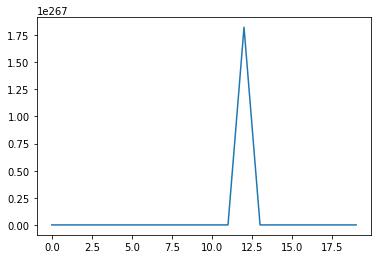

In [28]:
# Most of the variance can be explained using the first 8 or so components
plt.plot(E[:20])
plt.show()

In [17]:
P = np.dot(U[:,:2],np.diag(E[:2]))
print(P)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [18]:
# plot first two principal components to get an idea of the shape of the data
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        
p = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p.circle(P[:,0], P[:,1], size=4, color="navy", alpha=0.2)

# show the results
show(p)

In [ ]:
# SVM on PCA results

In [20]:
# Further divide training and testing based on principal components
# Slice U and E based on the ideal number of principal components
P = np.dot(U, np.diag(E))
P = P[:,:18]
PCA_xtrain, PCA_xtest, PCA_ytrain, PCA_ytest = train_test_split(P, train['valence'], test_size = 0.2, random_state = 0)

In [ ]:
SVM_clf = svm.SVR(kernel='linear')

In [ ]:
SVM_clf.fit(PCA_xtrain, PCA_ytrain)

In [ ]:
# testing error
SVM_test_ypreds = SVM_clf.predict(PCA_xtest)
SVM_test_MSE = np.mean((SVM_test_ypreds - PCA_ytest)**2)
SVM_test_MSE

In [ ]:
SVM_clf.score(PCA_xtest, PCA_ytest)

In [ ]:
SVM_clf.score(PCA_xtrain, PCA_ytrain)

In [ ]:
# training error
SVM_train_ypreds = SVM_clf.predict(PCA_xtrain)
SVM_test_MSE = np.mean((SVM_train_ypreds - PCA_ytrain)**2)
SVM_test_MSE

In [25]:
# Random Forest - Harry draft 1
# Use this
RF_ests = []
RF_results = []
n_estimators_range = range(50, 600, 50)

n_estimators = 120
for n_estimators in [120]:
    RF_clf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state = 0)
    RF_clf.fit(PCA_xtrain, PCA_ytrain)
    RF_ests.append(n_estimators)
    RF_results.append(RF_clf.score(PCA_xtest, PCA_ytest))

tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'
p_est_res = figure(plot_width=400,
                   plot_height=400,
                   title="Number of Trees vs Accuracy",
                   tools=_tools_to_show,
                   x_axis_label="Number of Trees",
                   y_axis_label="Accuracy")
# add a circle renderer with a size, color, and alpha
p_est_res.circle(RF_ests, RF_results, size=10, color="green", alpha=0.5)

# show the results
show(p_est_res)

In [ ]:
# Make copies of data without ID
xtrain_heir, xtest_heir, ytrain_heir, ytest_heir = train_test_split(xtrain, ytrain, test_size=0.20) 
xtrain_heir = xtrain_heir.iloc[:, 1:]
xtest_heir  = xtest_heir.iloc[:, 1:]

In [ ]:
# K-Nearest-Neighbors (on original data)
print("(n, weights):")
for n in [1, 5, 10, 25, 50, 100, 250, 500]:
    for weights in ['uniform', 'distance']:
        KNN_clf = KNeighborsRegressor(n_neighbors=n, weights=weights, n_jobs=-1)
        KNN_clf.fit(xtrain_heir, ytrain_heir)

        # Training error
        KNN_train_ypreds = KNN_clf.predict(xtrain_heir)
        KNN_train_MSE = np.mean((KNN_train_ypreds - ytrain_heir) ** 2)

        # Testing error
        KNN_test_ypreds = KNN_clf.predict(xtest_heir)
        KNN_test_MSE = np.mean((KNN_test_ypreds - ytest_heir) ** 2)
        
        print("({}, {}) -> Train({:.3f}) Test({:.3f})".format(n, weights, KNN_train_MSE, KNN_test_MSE))
        print("Score: {:.3f}".format(KNN_clf.score(xtest_heir, KNN_test_ypreds)))
    
"""
Values reported are MSE. Higher = worse
(n, weights):
(1, uniform) -> Train(0.000) Test(0.824)
(1, distance) -> Train(0.000) Test(0.824)
(5, uniform) -> Train(0.424) Test(0.644)
(5, distance) -> Train(0.000) Test(0.536)
(10, uniform) -> Train(0.505) Test(0.616)
(10, distance) -> Train(0.000) Test(0.489)
(25, uniform) -> Train(0.568) Test(0.607)
(25, distance) -> Train(0.000) Test(0.467)
(50, uniform) -> Train(0.598) Test(0.614)
(50, distance) -> Train(0.000) Test(0.466)
(100, uniform) -> Train(0.623) Test(0.626)
(100, distance) -> Train(0.000) Test(0.471)
(250, uniform) -> Train(0.654) Test(0.648)
(250, distance) -> Train(0.000) Test(0.485)
(500, uniform) -> Train(0.681) Test(0.673)
(500, distance) -> Train(0.000) Test(0.501)

For whatever reason score always comes out to exactly 1.000
From the above, we can't really say anything specific except that distance as a metric seems far more useful than 
uniform.
"""


In [ ]:
# Lasso (on it's own)
# Train
alpha = 0.01
lasso_model = linear_model.Lasso(alpha=alpha)
lasso_model.fit(xtrain_heir, ytrain_heir)

# Training error
lasso_train_ypreds = lasso_model.predict(xtrain_heir)
lasso_train_MSE = np.mean((lasso_train_ypreds - ytrain_heir) ** 2)

# Testing error
lasso_test_ypreds = lasso_model.predict(xtest_heir)
lasso_test_MSE = np.mean((lasso_test_ypreds - ytest_heir)**2)

# Also do linreg for comparison
linreg_model = linear_model.LinearRegression()
linreg_model.fit(xtrain_heir, ytrain_heir)

# Linreg train:
linreg_train_ypreds = linreg_model.predict(xtrain_heir)
linreg_train_MSE = np.mean((linreg_train_ypreds - ytrain_heir) ** 2)

# Linreg test
linreg_test_ypreds = linreg_model.predict(xtest_heir)
linreg_test_MSE = np.mean((linreg_test_ypreds - ytest_heir) ** 2)


# Output
print("alpha: {}".format(alpha))
print("training error (MSE): {}".format(lasso_train_MSE))
print("testing  error (MSE): {}".format(lasso_test_MSE))
print("training error linreg: ", linreg_train_MSE)
print("testing error linreg: ", linreg_test_MSE)

# Split into new testing/training dataset
scaler = lambda row: np.multiply(lasso_model.coef_, row) + lasso_model.intercept_
#scaler = lambda row: row
lasso_x = np.apply_along_axis(scaler, 1, xtrain_heir)
lasso_xtrain, lasso_xtest, lasso_ytrain, lasso_ytest = train_test_split(lasso_x, ytrain_heir, test_size = 0.2, random_state = 0)



# Findings (linreg on lasso):
# Values reported are MSE. Higher = worse
# Alpha=1.00: Train(1.002) Test(0.992) lmao
# Alpha=0.10: Train(0.725) Test(0.711)
# Alpha=0.01: Train(0.660) Test(0.650)
# Basic linreg: Train(0.657) Test(0.649)
# Conclusions - useless on its own

In [ ]:
# Random Forest on LASSO. Shouldn't really do anything different from PCA (probably)
RF_lasso_clf = RandomForestRegressor()

# specify parameters and distributions to sample from
RF_lasso_parameters_rand = {
    "n_estimators": sp_randint(10, 60),
    "bootstrap": [True, False],
}

# run randomized search
# Accuracy should be comparable to grid search, but runs much much faster
n_iter_search = 20
RF_lasso_random_search = RandomizedSearchCV(RF_lasso_clf, param_distributions=RF_lasso_parameters_rand,
                                   n_iter=n_iter_search,
                                   n_jobs=-1)

RF_lasso_random_search.fit(lasso_xtrain, lasso_ytrain)

RF_lasso_predicted = RF_lasso_random_search.predict(lasso_xtest)

print("LASSO with random forest")
RF_lasso_random_search.score(lasso_xtest, lasso_ytest)

# FINDINGS (RF on lasso):
# Values reported are score. Higher = better
# Alpha = 1.00 -> -0.000195
# Alpha = 0.10 -> 0.5323 
# Alpha = 0.01 -> 0.5261
# No Lasso -> 0.5326
# Conclusion - way worse than PCA on its own. Shouldn't use it solo

In [ ]:
# K-Nearest-Neighbors on LASSO
print("(n, weights):")
weights = 'distance'
for n in [1, 2, 3, 5, 10, 25, 50, 100, 250]:
    KNN_lasso_clf = KNeighborsRegressor(n_neighbors=n, weights=weights, n_jobs=-1)
    KNN_lasso_clf.fit(lasso_xtrain, lasso_ytrain)

    # Training error
    KNN_lasso_train_ypreds = KNN_lasso_clf.predict(lasso_xtrain)
    KNN_lasso_train_MSE = np.mean((KNN_lasso_train_ypreds - lasso_ytrain) ** 2)

    # Testing error
    KNN_lasso_test_ypreds = KNN_lasso_clf.predict(lasso_xtest)
    KNN_lasso_test_MSE = np.mean((KNN_lasso_test_ypreds - lasso_ytest) ** 2)

    print("({}, {}) -> Train({:.3f}) Test({:.3f})".format(n, weights, KNN_lasso_train_MSE, KNN_lasso_test_MSE))
    
"""
Findings (KNN on lasso):
Values reported are MSE - higher = worse
Alpha = 1.00:
Failed (Unbelievably high error, >1.5 and took 3 minutes to run n=1)

Alpha = 0.10:
(n, weights):
(1, distance) -> Train(0.000) Test(1.026)
(2, distance) -> Train(0.000) Test(0.795)
(3, distance) -> Train(0.000) Test(0.717)
(5, distance) -> Train(0.000) Test(0.648)
(10, distance) -> Train(0.000) Test(0.594)
(25, distance) -> Train(0.000) Test(0.558)
(50, distance) -> Train(0.000) Test(0.548)
(100, distance) -> Train(0.000) Test(0.547)
(250, distance) -> Train(0.000) Test(0.550)


Alpha = 0.01:
(n, weights):
(1, distance) -> Train(0.000) Test(0.901)
(2, distance) -> Train(0.000) Test(0.707)
(3, distance) -> Train(0.000) Test(0.641)
(5, distance) -> Train(0.000) Test(0.577)
(10, distance) -> Train(0.000) Test(0.525)
(25, distance) -> Train(0.000) Test(0.504)
(50, distance) -> Train(0.000) Test(0.502)
(100, distance) -> Train(0.000) Test(0.506)
(250, distance) -> Train(0.000) Test(0.514)

"""

In [ ]:
# SVM on LASSO:
print("alpha: {}".format(alpha))
SVM_lasso_clf = svm.SVR(kernel='linear')
SVM_lasso_clf.fit(lasso_xtrain, lasso_ytrain)

# Training error
SVM_lasso_train_ypreds = SVM_lasso_clf.predict(lasso_xtrain)
SVM_lasso_train_MSE = np.mean((SVM_lasso_train_ypreds - lasso_ytrain) ** 2)

# Testing error
SVM_lasso_test_ypreds = SVM_lasso_clf.predict(lasso_xtest)
SVM_lasso_test_MSE = np.mean((SVM_lasso_test_ypreds - lasso_ytest) ** 2)
print("Error MSE: Train({:.3f}) Test({:.3f})".format(SVM_lasso_train_MSE, SVM_lasso_test_MSE))

"""
Results:
(Note: results given in MSE. Higher = worse)
Alpha = 1.0:
Error MSE: Train(0.999) Test(1.016) 

Alpha = 0.1:
Error MSE: Train(0.704) Test(0.724)

Alpha = 0.01:
Error MSE: Train(0.660) Test(0.672)

Conclusion: It's garbo

"""

In [ ]:
# Lasso on PCA
# Train
alpha = 0.01
PCA_lasso_model = linear_model.Lasso(alpha=alpha)
PCA_lasso_model.fit(PCA_xtrain, PCA_ytrain)

# Training error
PCA_lasso_train_ypreds = PCA_lasso_model.predict(PCA_xtrain)
PCA_lasso_train_MSE = np.mean((PCA_lasso_train_ypreds - PCA_ytrain) ** 2)

# Testing error
PCA_lasso_test_ypreds = PCA_lasso_model.predict(PCA_xtest)
PCA_lasso_test_MSE = np.mean((PCA_lasso_test_ypreds - PCA_ytest) ** 2)

# Also do linreg for comparison
PCA_linreg_model = linear_model.LinearRegression()
PCA_linreg_model.fit(PCA_xtrain, PCA_ytrain)

# Linreg train:
PCA_linreg_train_ypreds = PCA_linreg_model.predict(PCA_xtrain)
PCA_linreg_train_MSE = np.mean((PCA_linreg_train_ypreds - PCA_ytrain) ** 2)

# Linreg test
PCA_linreg_test_ypreds = PCA_linreg_model.predict(PCA_xtest)
PCA_linreg_test_MSE = np.mean((PCA_linreg_test_ypreds - PCA_ytest) ** 2)


# Output
print("alpha: {}".format(alpha))
print("training error (MSE): {}".format(PCA_lasso_train_MSE))
print("testing  error (MSE): {}".format(PCA_lasso_test_MSE))
print("training error linreg: ", PCA_linreg_train_MSE)
print("testing error linreg: ", PCA_linreg_test_MSE)

# Split into new testing/training dataset
scaler = lambda row: np.multiply(PCA_lasso_model.coef_, row) + PCA_lasso_model.intercept_
PCA_lasso_x = np.apply_along_axis(scaler, 1, PCA_xtrain)
PCA_lasso_xtrain, PCA_lasso_xtest, PCA_lasso_ytrain, PCA_lasso_ytest = train_test_split(PCA_lasso_x, PCA_ytrain, test_size = 0.2, random_state = 0)

# FINDINGS (linreg on PCA->Lasso)
# Values reported are MSE: Higher = worse
# Alpha = 1.00-> Train(0.2810) Test(0.2913)
# Alpha = 0.10-> Train(0.0881) Test(0.0971)
# Alpha = 0.01-> Train(0.0670) Test(0.0737)
# No Lasso (linreg normally): Train(0.064) Test(0.071)
# Conclusion: Lasso on PCA doesn't help for just linear regression

In [ ]:
# SVM on PCA->LASSO:
print("alpha: {}".format(alpha))
SVM_PCA_lasso_clf = svm.SVR(kernel='linear')
SVM_PCA_lasso_clf.fit(PCA_lasso_xtrain, PCA_lasso_ytrain)

# Training error
SVM_PCA_lasso_train_ypreds = SVM_PCA_lasso_clf.predict(PCA_lasso_xtrain)
SVM_PCA_lasso_train_MSE = np.mean((SVM_PCA_lasso_train_ypreds - PCA_lasso_ytrain) ** 2)

# Testing error
SVM_PCA_lasso_test_ypreds = SVM_PCA_lasso_clf.predict(PCA_lasso_xtest)
SVM_PCA_lasso_test_MSE = np.mean((SVM_PCA_lasso_test_ypreds - PCA_lasso_ytest) ** 2)
print("Error MSE: Train({:.3f}) Test({:.3f})".format(SVM_PCA_lasso_train_MSE, SVM_PCA_lasso_test_MSE))

"""
Results:
Alpha = 1.00
Error MSE: Train(0.177) Test(0.177)

Alpha = 0.10
Train(0.086) Test(0.075)

Alpha = 0.01:
Train(0.069) Test(0.064) <--- WOW -- equiv to a score of 0.936
"""

In [ ]:
# Advanced SVM on PCA->LASSO utilizing  different values of C
C_range = 10. ** np.arange(4, 7)
C_MSE = []

# HERE: PCALSVMC is PCA->Lasso->SVM with C param
def computePCALSVMC_MSE(C):
    PCALSVMC_clf = svm.SVR(kernel='rbf', C = C)
    PCALSVMC_clf.fit(PCA_lasso_xtrain, PCA_lasso_ytrain)
    PCALSVMC_test_ypreds = PCALSVMC_clf.predict(PCA_lasso_xtest)
    PCALSVMC_test_MSE = np.mean((PCALSVMC_test_ypreds - PCA_lasso_ytest)**2)
    return PCALSVMC_test_MSE

C_MSE = pool.map(computePCALSVMC_MSE, C_range)
    
print("alpha: {}".format(alpha))
for c, mse in zip(C_range, C_MSE):
    print("C({}) MSE({})".format(c, mse))
    
"""
alpha: 0.01
C(0.001) MSE(0.9956695791988903)
C(0.01) MSE(0.9923254768785487)
C(0.1) MSE(0.9594169761856932)
C(1.0) MSE(0.6872493268512234)
C(10.0) MSE(0.1496952613657234)
C(100.0) MSE(0.08604381918340415)
C(1000.0) MSE(0.0787053108083247)
C(10000.0) MSE(0.07034445994490687)
C(50000) MSE(0.059558527959229696)
C(100000.0) MSE(0.054695510721515204)
C(150000) MSE(0.05171920548369242)
C(1000000.0) MSE(0.0736315107354647)
C(10000000.0) MSE(4.197551598806395)
C(100000000.0) MSE(356.09536694427385)

POST DROP TO "REAL" COMPONENTS:
C(0.01) MSE(0.9923254768785487)
C(0.1) MSE(0.9594169761856932)
C(1.0) MSE(0.6872493268512234)
C(10.0) MSE(0.1496952613657234)
C(100.0) MSE(0.08604381918340415)
C(1000.0) MSE(0.0787053108083247)
C(10000.0) MSE(0.07034445994490687)
C(100000.0) MSE(0.054695510721515204)
C(1000000.0) MSE(0.0736315107354647)


"""

In [ ]:
# Plot values of C vs MSE
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        
p_C_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_C_MSE.circle (C_range, C_MSE, size=10, color="green", alpha=0.5)

# show the results
show(p_C_MSE)

In [ ]:
# Using our optimal value of C, we cross validate to find the optimal value of gamma
from itertools import chain
gamma_range = chain(10. ** np.arange(-5, 1), [0.2, 0.3, 0.4])
def computePCALSVMC_MSE_GAMMA(g): 
    PCALSVMC_clf = svm.SVR(kernel='rbf', C = 150000, gamma = g)
    PCALSVMC_clf.fit(PCA_lasso_xtrain, PCA_lasso_ytrain)
    PCALSVMC_test_ypreds = PCALSVMC_clf.predict(PCA_lasso_xtest)
    PCALSVMC_test_MSE = np.mean((PCALSVMC_test_ypreds - PCA_lasso_ytest)**2)
    gamma_MSE.append(PCALSVMC_test_MSE)
    
    
gamma_MSE = pool.map(computePCALSVMC_MSE_GAMMA, gamma_range)
    
print("alpha: {}".format(alpha))
print("C = 150000")
for c, mse in zip(gamma_range, gamma_MSE):
    print("gamma({}) MSE({})".format(c, mse)) 
   


'''
C = 15000
gamma(1e-05) MSE(0.08045146016190116)
gamma(0.0001) MSE(0.06162189690329871)
gamma(0.001) MSE(0.028257963289700597)
gamma(0.01) MSE(0.009621058122301473)
gamma(0.1) MSE(0.008151309634909475)
gamma(0.2) MSE(0.009688701255743915)
gamma(0.3) MSE(0.009684018266092493)
gamma(0.4) MSE(0.009733114479588486)
gamma(1.0) MSE(0.010803416697807116)

'''

In [ ]:
for c, mse in zip(gamma_range, gamma_MSE):
    print("gamma({}) MSE({})".format(c, mse)) 

In [ ]:
# Random forest on PCA->LASSO:
RF_PCA_lasso_clf = RandomForestRegressor()

# specify parameters and distributions to sample from
RF_PCA_lasso_parameters_rand = {
    "n_estimators": sp_randint(10, 60),
    "bootstrap": [True, False]
}

# run randomized search
# Accuracy should be comparable to grid search, but runs much much faster
n_iter_search = 20
RF_PCA_lasso_random_search = RandomizedSearchCV(RF_PCA_lasso_clf, param_distributions=RF_PCA_lasso_parameters_rand,
                                    n_iter=n_iter_search,
                                    n_jobs=-1,
                                    random_state=0)

RF_PCA_lasso_random_search.fit(PCA_lasso_xtrain, PCA_lasso_ytrain)

RF_PCA_lasso_predicted = RF_PCA_lasso_random_search.predict(PCA_lasso_xtest)

print("PCA->LASSO with random forest")
print("alpha = {}".format(alpha))
RF_PCA_lasso_random_search.score(PCA_lasso_xtest, PCA_lasso_ytest)

# FINDINGS (RF on PCA->lasso):
# Values reported are score. Higher = better
# Alpha = 1.00 -> 0.852
# Alpha = 0.10 -> 0.911
# Alpha = 0.01 -> 0.910
# No lasso (taken from above) -> 0.914
# Conclusion: It isn't the worst thing in the world, but is ultimately probably worse than RF on PCA without lasso
# Note that unless seeded, results vary fairly significantly from run to run.


In [ ]:
# K-Nearest-Neighbors on PCA->LASSO
print("alpha = {}".format(alpha))
print("(n, weights):")
weights = 'distance'
for n in [1, 2, 3, 5, 10, 25, 50, 100, 250]:
    KNN_PCA_lasso_clf = KNeighborsRegressor(n_neighbors=n, weights=weights, n_jobs=-1)
    KNN_PCA_lasso_clf.fit(PCA_lasso_xtrain, PCA_lasso_ytrain)

    # Training error
    KNN_PCA_lasso_train_ypreds = KNN_PCA_lasso_clf.predict(PCA_lasso_xtrain)
    KNN_PCA_lasso_train_MSE = np.mean((KNN_PCA_lasso_train_ypreds - PCA_lasso_ytrain) ** 2)

    # Testing error
    KNN_PCA_lasso_test_ypreds = KNN_PCA_lasso_clf.predict(PCA_lasso_xtest)
    KNN_PCA_lasso_test_MSE = np.mean((KNN_PCA_lasso_test_ypreds - PCA_lasso_ytest) ** 2)

    print("({}, {}) -> Train({:.3f}) Test({:.3f})".format(n, weights, KNN_PCA_lasso_train_MSE, KNN_PCA_lasso_test_MSE))
    
"""
Findings (KNN on PCA->lasso):
Values reported are MSE - higher = worse
Alpha = 1.00:
(n, weights):
(1, distance) -> Train(0.000) Test(0.261)
(2, distance) -> Train(0.000) Test(0.194)
(3, distance) -> Train(0.000) Test(0.171)
(5, distance) -> Train(0.000) Test(0.153)
(10, distance) -> Train(0.000) Test(0.143)
(25, distance) -> Train(0.000) Test(0.145)
(50, distance) -> Train(0.000) Test(0.152)
(100, distance) -> Train(0.000) Test(0.170)
(250, distance) -> Train(0.000) Test(0.213)

Alpha = 0.10:
(n, weights):
(1, distance) -> Train(0.000) Test(0.153)
(2, distance) -> Train(0.000) Test(0.105)
(3, distance) -> Train(0.000) Test(0.088)
(5, distance) -> Train(0.000) Test(0.077)
(10, distance) -> Train(0.000) Test(0.078)
(25, distance) -> Train(0.000) Test(0.084)
(50, distance) -> Train(0.000) Test(0.099)
(100, distance) -> Train(0.000) Test(0.121)
(250, distance) -> Train(0.000) Test(0.165)


Alpha = 0.01:
(n, weights):
(1, distance) -> Train(0.000) Test(0.141)
(2, distance) -> Train(0.000) Test(0.096)
(3, distance) -> Train(0.000) Test(0.081)
(5, distance) -> Train(0.000) Test(0.073)
(10, distance) -> Train(0.000) Test(0.075)
(25, distance) -> Train(0.000) Test(0.083)
(50, distance) -> Train(0.000) Test(0.098)
(100, distance) -> Train(0.000) Test(0.120)
(250, distance) -> Train(0.000) Test(0.162)

alpha = 0.001
(n, weights):
(1, distance) -> Train(0.000) Test(0.140)
(2, distance) -> Train(0.000) Test(0.097)
(3, distance) -> Train(0.000) Test(0.081)
(5, distance) -> Train(0.000) Test(0.072)
(10, distance) -> Train(0.000) Test(0.073)
(25, distance) -> Train(0.000) Test(0.083)
(50, distance) -> Train(0.000) Test(0.098)
(100, distance) -> Train(0.000) Test(0.120)
(250, distance) -> Train(0.000) Test(0.162)

"""

In [ ]:
# K-Nearest-Neighbors on PCA (probably should've done this one first)
print("alpha = {}".format(alpha))
print("(n, weights):")
weights = 'distance'
for n in [1, 2, 3, 5, 10, 25, 50, 100, 250]:
    KNN_PCA_clf = KNeighborsRegressor(n_neighbors=n, weights=weights, n_jobs=-1)
    KNN_PCA_clf.fit(PCA_xtrain, PCA_ytrain)

    # Training error
    KNN_PCA_train_ypreds = KNN_PCA_clf.predict(PCA_xtrain)
    KNN_PCA_train_MSE = np.mean((KNN_PCA_train_ypreds - PCA_ytrain) ** 2)

    # Testing error
    KNN_PCA_test_ypreds = KNN_PCA_clf.predict(PCA_xtest)
    KNN_PCA_test_MSE = np.mean((KNN_PCA_test_ypreds - PCA_ytest) ** 2)

    print("({}, {}) -> Train({:.3f}) Test({:.3f})".format(n, weights, KNN_PCA_train_MSE, KNN_PCA_test_MSE))
    
"""
Findings (KNN on PCA):
Values reported are MSE - higher = worse
(n, weights):
(1, distance) -> Train(0.000) Test(0.205)
(2, distance) -> Train(0.000) Test(0.141)
(3, distance) -> Train(0.000) Test(0.119)
(5, distance) -> Train(0.000) Test(0.111)
(10, distance) -> Train(0.000) Test(0.110)
(25, distance) -> Train(0.000) Test(0.133)
(50, distance) -> Train(0.000) Test(0.163)
(100, distance) -> Train(0.000) Test(0.199)
(250, distance) -> Train(0.000) Test(0.266)

Note: Seems to run noticeably slower than lasso 
"""

In [ ]:
PCA_xtrain.shape